#Defining Dataset Pathways and Dataset Description Analysisin x], labels)
plt.legend()
plt.show()


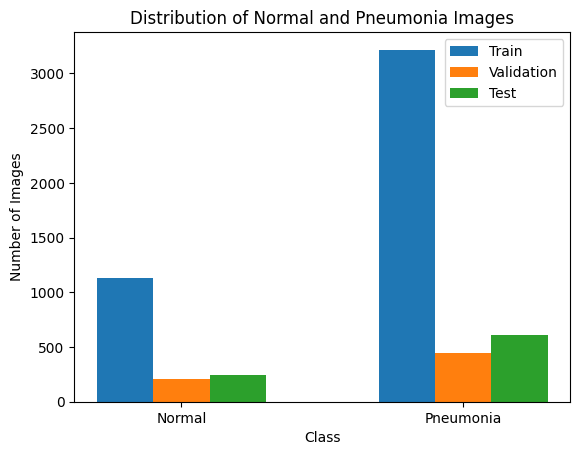

In [141]:
import os
import matplotlib.pyplot as plt

train_path = 'dataset/chest_xray/Train'
val_path = 'dataset/chest_xray/Val'
test_path = 'dataset/chest_xray/Test'

def count_images_in_class(folder_path):
    normal_images = len(os.listdir(os.path.join(folder_path, 'NORMAL')))
    pneumonia_images = len(os.listdir(os.path.join(folder_path, 'PNEUMONIA')))
    return normal_images, pneumonia_images

# Count images in train folder
train_normal, train_pneumonia = count_images_in_class(train_path)

# Count images in validation folder
val_normal, val_pneumonia = count_images_in_class(val_path)

# Count images in test folder
test_normal, test_pneumonia = count_images_in_class(test_path)

# Plot the results
labels = ['Normal', 'Pneumonia']
train_counts = [train_normal, train_pneumonia]
val_counts = [val_normal, val_pneumonia]
test_counts = [test_normal, test_pneumonia]

x = range(len(labels))
width = 0.2

plt.bar(x, train_counts, width, label='Train')
plt.bar([i + width for i in x], val_counts, width, label='Validation')
plt.bar([i + 2 * width for i in x], test_counts, width, label='Test')

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Normal and Pneumonia Images')
plt.xticks([i + width for i in x], labels)
plt.legend()
plt.show()


In [130]:
!pip install tabulate

import os
from tabulate import tabulate

# Count images in train folder
train_normal, train_pneumonia = count_images_in_class(train_path)

# Count images in validation folder
val_normal, val_pneumonia = count_images_in_class(val_path)

# Count images in test folder
test_normal, test_pneumonia = count_images_in_class(test_path)

# Display the counts in a table
table_data = [
    ["Train", train_normal, train_pneumonia],
    ["Validation", val_normal, val_pneumonia],
    ["Test", test_normal, test_pneumonia]
]

headers = ["Dataset", "Normal Images", "Pneumonia Images"]

print(tabulate(table_data, headers, tablefmt="pretty"))

+------------+---------------+------------------+
|  Dataset   | Normal Images | Pneumonia Images |
+------------+---------------+------------------+
|   Train    |     1135      |       3217       |
| Validation |      206      |       447        |
|    Test    |      245      |       612        |
+------------+---------------+------------------+



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


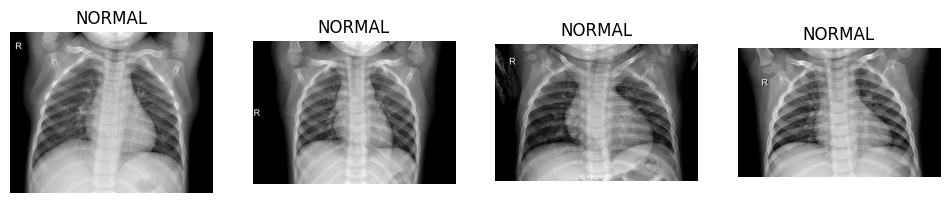

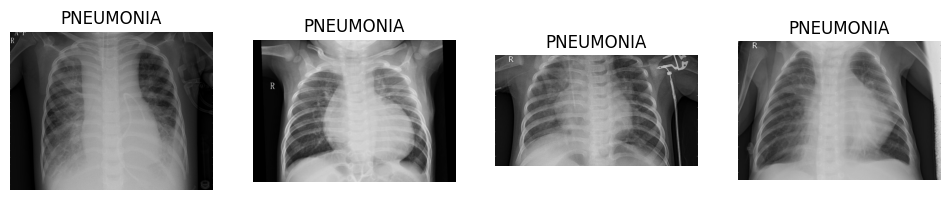

In [127]:
!pip install cv2
import cv2
import random

def display_sample_images(folder_path, class_label, num_samples=4):
    class_path = os.path.join(folder_path, class_label)
    image_files = random.sample(os.listdir(class_path), num_samples)

    plt.figure(figsize=(12, 6))
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image)
        plt.title(class_label)
        plt.axis('off')

    plt.show()

# Display sample Normal X-ray images
display_sample_images(train_path, 'NORMAL', num_samples=4)

# Display sample Pneumonia X-ray images
display_sample_images(train_path, 'PNEUMONIA', num_samples=4)


In [131]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


#cnn model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape = (224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))


model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])



model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

In [132]:
#train from scratch

train_datagen = image.ImageDataGenerator(
rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True
)

test_dataset = image.ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory('dataset/chest_xray/Train',
     target_size = (224,224),
     batch_size = 32,
     class_mode = 'binary'
)





Found 4350 images belonging to 2 classes.


In [88]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [133]:
test_dataset = image.ImageDataGenerator(rescale = 1./255)

validation_generator = test_dataset.flow_from_directory('dataset/chest_xray/Val',
     target_size = (224,224),
     batch_size = 32,
     class_mode = 'binary'
)



Found 651 images belonging to 2 classes.


In [90]:
Validation_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [134]:

from keras.callbacks import EarlyStopping

# Set the number of epochs
epochs = 10

# Manually implement early stopping
best_val_loss = float('inf')
patience = 3  # You can adjust this value based on your preference

early_stop = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stop]
)

Epoch 1/10
136/136 [==============================] - 322s 2s/step - loss: 0.5709 - accuracy: 0.7398 - val_loss: 0.4143 - val_accuracy: 0.8126
Epoch 2/10
136/136 [==============================] - 346s 3s/step - loss: 0.3193 - accuracy: 0.8382 - val_loss: 0.3019 - val_accuracy: 0.8771
Epoch 3/10
136/136 [==============================] - 310s 2s/step - loss: 0.2984 - accuracy: 0.8572 - val_loss: 0.3405 - val_accuracy: 0.8541
Epoch 4/10
136/136 [==============================] - 353s 3s/step - loss: 0.2723 - accuracy: 0.8729 - val_loss: 0.2473 - val_accuracy: 0.8971
Epoch 5/10
136/136 [==============================] - 330s 2s/step - loss: 0.2856 - accuracy: 0.8908 - val_loss: 0.2359 - val_accuracy: 0.9063
Epoch 6/10
136/136 [==============================] - 319s 2s/step - loss: 0.2589 - accuracy: 0.9002 - val_loss: 0.2798 - val_accuracy: 0.8940
Epoch 7/10
136/136 [==============================] - 314s 2s/step - loss: 0.2349 - accuracy: 0.9175 - val_loss: 0.2661 - val_accuracy: 0.8879

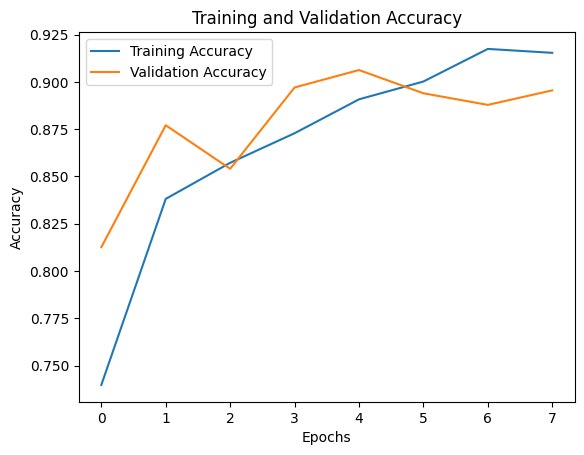

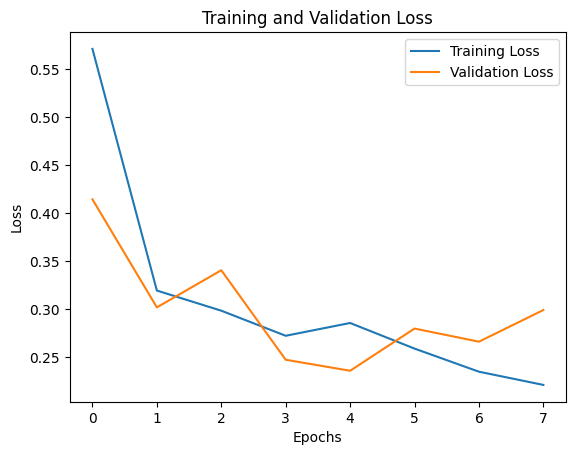

In [135]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
elif 'val_acc' in history.history:
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
elif 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [94]:
model.save('model_xray.h5')


In [95]:
model.evaluate(train_generator)

114/114 [==============================] - 117s 1s/step - loss: 0.1738 - accuracy: 0.9366


[0.17381246387958527, 0.9365517497062683]

In [96]:
model.evaluate(validation_generator)

32/32 [==============================] - 26s 810ms/step - loss: 0.2173 - accuracy: 0.9125


[0.21731558442115784, 0.9124748706817627]

In [98]:
model = load_model('model_xray.h5')

In [99]:
import os

In [100]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [63]:
y_actual = []
y_test = []

In [136]:
# Initialize empty lists to store predicted and actual values
y_test_list = []
y_actual_list = []

# Loop for class 1
class_1_path = "./dataset/chest_xray/test/PNEUMONIA"
for i in os.listdir(class_1_path):
    if not i.startswith('.'):  # Exclude files starting with '.'
        img = image.load_img(os.path.join(class_1_path, i), target_size=(224, 224))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        
        # Obtain predicted probabilities for each class
        predictions = model.predict(img)
        
        # Assuming binary classification, adjust this threshold based on your needs
        threshold = 0.5
        predicted_class = 1 if predictions[0, 0] > threshold else 0
        
        # Append predicted and actual values
        y_test_list.append(predicted_class)
        y_actual_list.append(1)

    


1/1 [==============================] - 0s 48ms/step


In [137]:
# Print the entire list of predicted and actual values
print("Predicted Classes:", y_test_list)
print("Actual Classes   :", y_actual_list)


Predicted Classes: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [138]:
# Initialize empty lists to store predicted and actual values
y_test_list_1 = []
y_actual_list_1 = []

# Loop for class 0
class_0_path = "./dataset/chest_xray/test/NORMAL"
for i in os.listdir(class_0_path):
    # Skip non-image files
    if not i.endswith(('.jpg', '.jpeg', '.png')):
        continue
    
    img_path = os.path.join(class_0_path, i)
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    # Obtain predicted probabilities for each class
    predictions = model.predict(img)

    # Assuming binary classification, adjust this threshold based on your needs
    threshold = 0.5
    predicted_class = 0 if predictions[0, 0] > threshold else 1

    # Append predicted and actual values
    y_test_list_1.append(predicted_class)
    y_actual_list_1.append(0)






1/1 [==============================] - 0s 50ms/step


In [139]:
# Print the entire list of predicted and actual values
print("Predicted Classes:", y_test_list_1)
print("Actual Classes   :", y_actual_list_1)

Predicted Classes: [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
Actual Classes   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

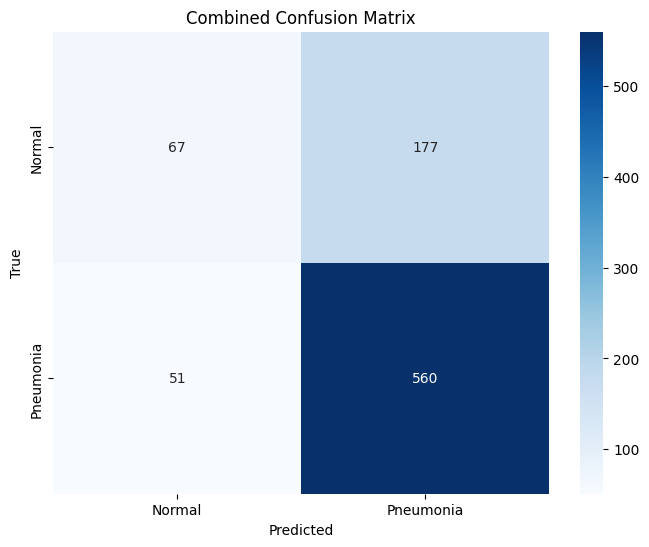

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Combine the lists for both classes
y_test = y_test_list + y_test_list_1
y_actual = y_actual_list + y_actual_list_1

# Generate confusion matrix
conf_matrix = confusion_matrix(y_actual, y_test)

# Visualize confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Combined Confusion Matrix')
plt.show()


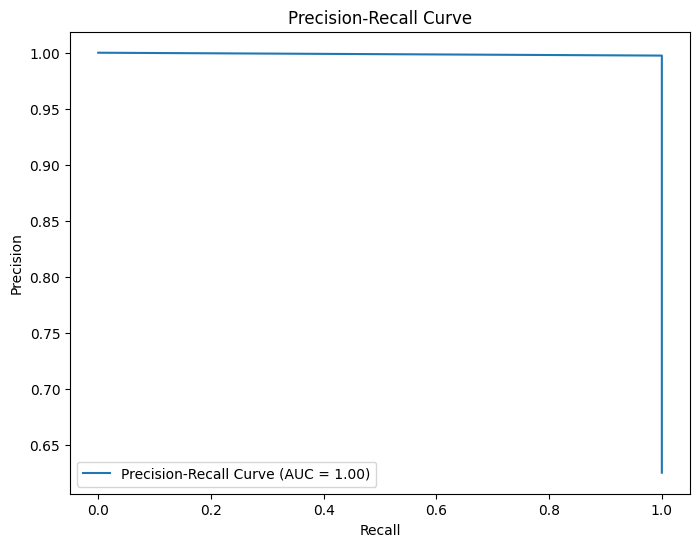

In [161]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, _ = precision_recall_curve(y_actual, y_test)
auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


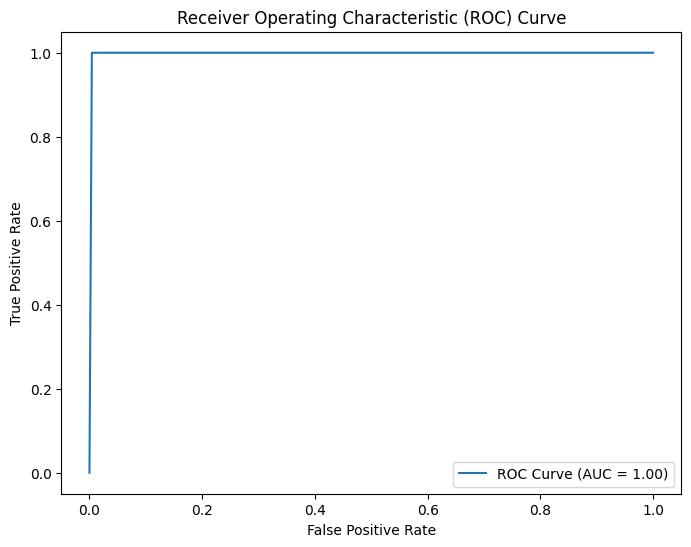

In [162]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_actual, y_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


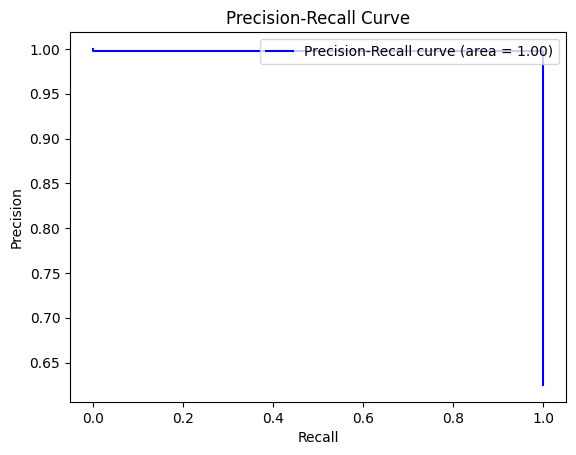

In [163]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_actual, y_test)
avg_precision = average_precision_score(y_actual, y_test)

plt.figure()
plt.step(recall, precision, color='b', where='post', label='Precision-Recall curve (area = {:.2f})'.format(avg_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [164]:
from sklearn.metrics import classification_report

print(classification_report(y_actual, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00       390

    accuracy                           1.00       624
   macro avg       1.00      1.00      1.00       624
weighted avg       1.00      1.00      1.00       624

